In [28]:





# import the packages we are going to be using
import numpy as np # for getting our distribution
import matplotlib.pyplot as plt # for plotting
import seaborn as sns; sns.set() # For a different plotting theme

from scipy import stats
import pandas as pd

from sklearn.model_selection import ShuffleSplit
from scipy.stats import skew






In [29]:
house_train_data = pd.read_csv("wk3_kc_house_train_data.csv")
house_test_data = pd.read_csv("wk3_kc_house_test_data.csv")
house_valid_data = pd.read_csv("wk3_kc_house_valid_data.csv")

combined_training_validate = pd.read_csv("House_train_validate_combined.csv")

In [30]:
house_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
id               9761 non-null int64
date             9761 non-null object
price            9761 non-null float64
bedrooms         9761 non-null int64
bathrooms        9761 non-null float64
sqft_living      9761 non-null int64
sqft_lot         9761 non-null int64
floors           9761 non-null float64
waterfront       9761 non-null int64
view             9761 non-null int64
condition        9761 non-null int64
grade            9761 non-null int64
sqft_above       9761 non-null int64
sqft_basement    9761 non-null int64
yr_built         9761 non-null int64
yr_renovated     9761 non-null int64
zipcode          9761 non-null int64
lat              9761 non-null float64
long             9761 non-null float64
sqft_living15    9761 non-null int64
sqft_lot15       9761 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 1.6+ MB


In [31]:
house_train_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [32]:
house_train_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [33]:
house_train_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [34]:
#sns.heatmap(house_train_data, annot=True)
type(house_train_data)

pandas.core.frame.DataFrame

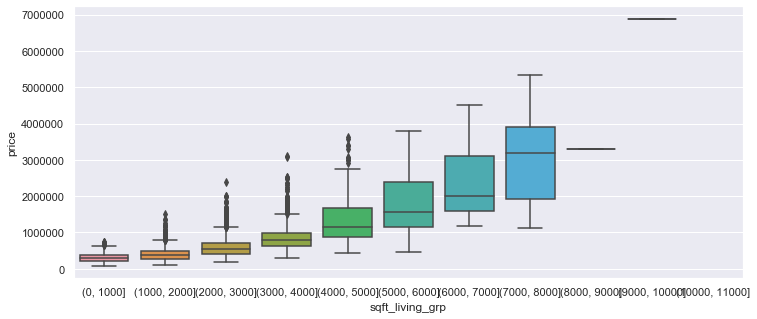

In [43]:
house_train_data["sqft_living_grp"] = pd.cut(house_train_data.sqft_living, [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000])
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
sns.boxplot(x="sqft_living_grp", y="price", data=house_train_data)  # Make boxplot of BPXSY1 stratified by age group

In [45]:
house_train_data["price_grp"] = pd.cut(house_train_data.price, [0,100000,200000,300000,400000,500000,600000,700000,800000,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000])
x=pd.crosstab(house_train_data["price_grp"],house_train_data["sqft_living_grp"])

In [49]:
x
#x.apply(lambda z: z/z.sum(), axis=1) # normalize in rows or columns axis 1/0

sqft_living_grp,"(0, 1000]","(1000, 2000]","(2000, 3000]","(3000, 4000]","(4000, 5000]","(5000, 6000]","(6000, 7000]","(7000, 8000]","(8000, 9000]","(9000, 10000]"
price_grp,,,,,,,,,,
"(0, 100000]",11,1,0,0,0,0,0,0,0,0
"(100000, 200000]",146,213,4,0,0,0,0,0,0,0
"(200000, 300000]",211,1311,193,2,0,0,0,0,0,0
"(300000, 400000]",188,1120,565,48,0,0,0,0,0,0
"(400000, 500000]",98,923,539,82,10,1,0,0,0,0
"(500000, 600000]",24,546,552,114,11,0,0,0,0,0
"(600000, 700000]",8,288,467,121,9,2,0,0,0,0
"(700000, 800000]",3,107,281,177,14,3,0,0,0,0
"(800000, 1000000]",0,71,279,276,51,6,0,0,0,0


In [ ]:
X=house_train_data['sqft_living']
Y=house_train_data['price']
sns.distplot(X, bins=10)


In [ ]:

sns.lmplot(x='sqft_living', y='price', data=house_train_data)


In [ ]:
plt.rcParams['figure.figsize'] = (25.0, 25.0)

#fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(house_train_data.corr(),annot=True,linewidths=3, vmin=-1, vmax=1, center= 0,cmap= 'coolwarm',cbar_kws= {'orientation': 'horizontal'},square=True)#cbar=False,linecolor='black',

In [ ]:
correlation_matrix = house_train_data.corr()
correlation_matrix

In [ ]:
matrix = np.triu(house_train_data.corr())
sns.heatmap(house_train_data.corr(), annot=True, mask=matrix)

In [ ]:

mask = np.tril(house_train_data.corr())
sns.heatmap(house_train_data.corr(), annot=True, mask=mask)

In [ ]:
price = house_train_data['price']

# Minimum price of the data
minimum_price = np.amin(price)

# Maximum price of the data
maximum_price = np.amax(price)

# Mean price of the data
mean_price = np.mean(price)

# Median price of the data
median_price = np.median(price)

# Standard deviation of prices of the data
std_price = np.std(price)

# Show the calculated statistics
print("Statistics for Training housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))


In [ ]:
house_train_data.columns

## Feature Observation


As a reminder, we are using 5 features from the housing dataset based on the correlation ratios being high with target 'price' from the heatmap: 
['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']


In [ ]:
price = house_train_data['price']
features = house_train_data[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]

# Simple regression model that predicts price from square feet

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# create X and y
#feature_cols =[ 'sqft_living']
feature_cols=['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']
X = house_train_data[feature_cols]
y = house_train_data.price


# instantiate and fit
X_train = house_train_data[feature_cols]
X_test  = house_test_data[feature_cols]
y_train = house_train_data.price
y_test  = house_test_data.price

#X_train, X_test, y_train, y_test = split_data(19321,X,y)

lm0 = LinearRegression()
lm0.fit(X_train, y_train)
lm0_preds = lm0.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm0_preds)))
print("R^2: ", r2_score(y_test, lm0_preds))

In [ ]:
print(X_train.shape, y_train.shape)

In [ ]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm0)
#visualizer = PredictionError(model[139])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

In [ ]:
visualizer = ResidualsPlot(lm0)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.poof()

In [ ]:
sns.pairplot(house_train_data, height=2.5)
plt.tight_layout()

## Relationship between Features and Response

In [ ]:
sns.pairplot(house_train_data, x_vars=['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15'], y_vars='price', height=7, aspect=0.7)

# Multiple Linear Regression - Estimating Coefficients

In [ ]:
from sklearn.linear_model import LinearRegression

# create X and y
feature_cols =['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']
X = house_train_data[feature_cols]
y = house_train_data.price

# instantiate and fit
lm1 = LinearRegression()
lm1.fit(X, y)

# print the coefficients
print(lm1.intercept_)
print(lm1.coef_)

lm1_preds = lm1.predict(X[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']])
print("R^2: ", r2_score(y, lm1_preds))

In [ ]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm1.coef_))

# Feature Selection

In [22]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[['sqft_living', 'grade','sqft_living15']], y)
lm2_preds = lm2.predict(X[['sqft_living', 'grade','sqft_living15']])

print("R^2: ", r2_score(y, lm2_preds))

R^2:  0.5357314369915656


# Model Evaluation Using Train/Test Split and Metrics

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# create X and y
feature_cols =['bedrooms','bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']
X = house_train_data[feature_cols]
y = house_train_data.price

# instantiate and fit
X_train = house_train_data[feature_cols]
X_test  = house_test_data[feature_cols]
y_train = house_train_data.price
y_test  = house_test_data.price

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm4 = LinearRegression()
lm4.fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

In [ ]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm4)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

In [ ]:
visualizer = ResidualsPlot(lm4)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.poof()

In [ ]:
from yellowbrick.features import Rank2D
X= house_train_data[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'sqft_living15', 'sqft_lot15']]
visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)
visualizer.show()

## Adding more Features

In [23]:



from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# create X and y
All_feature_cols =['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'sqft_living15', 'sqft_lot15']
X = house_train_data[All_feature_cols]
y = house_train_data.price

# instantiate and fit
X_train = house_train_data[All_feature_cols]
X_test  = house_test_data[All_feature_cols]
y_train = house_train_data.price
y_test  = house_test_data.price

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm6 = LinearRegression()
lm6.fit(X_train, y_train)
lm6_preds = lm6.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm6_preds)))
print("R^2: ", r2_score(y_test, lm6_preds))

RMSE : 217847.78011702784
R^2:  0.6304167625835493


In [ ]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm6)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

In [ ]:
visualizer = ResidualsPlot(lm6)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.poof()

In [ ]:
# pair the feature names with the coefficients
list(zip(All_feature_cols, lm5.coef_))

In [ ]:
Feature_cols_ext = ['bathrooms',  'sqft_living', 'sqft_lot',  'floors',  'waterfront',
 'view', 
 'condition',
 'grade', 
 'sqft_above',
 'sqft_basement',
 
 'yr_renovated', 
 
 'sqft_living15']



from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# create X and y
All_feature_cols =['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'sqft_living15', 'sqft_lot15']
X = house_train_data[Feature_cols_ext]
y = house_train_data.price

# instantiate and fit
X_train = house_train_data[Feature_cols_ext]
X_test  = house_test_data[Feature_cols_ext]
y_train = house_train_data.price
y_test  = house_test_data.price

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm5 = LinearRegression()
lm5.fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2: ", r2_score(y_test, lm5_preds))

In [ ]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm5)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

In [ ]:
x = house_Train_data.crosstab(house_train_data.DMDEDUC2x, da.DMDMARTLx)
x

In [27]:
house_train_data.columns



Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
poly2_data,model=get_polynom_model(house_train_data,2)
inputt = polynomial_dataframe(house_test_data['sqft_living'], 2)
predictions = model.predict(inputt)
poly2_data['price'] = house_train_data['price']
output = house_test_data['price']
    #RSS1 = (predictions - output)**2
    #print(i,RSS1.sum())
    
print(i,"RMSE :", np.sqrt(mean_squared_error(output, predictions)))
print("R^2: ", r2_score(output, predictions))

In [ ]:
plt.plot(inputt,output,'.',
         inputt, model.predict(inputt),'-')

In [ ]:
def plot_fitted_line(set_data,i):
    poly15_data, model15 = get_polynom_model(set_data,i)
    return plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
           poly15_data['power_1'], model15.predict(poly15_data),'-')

In [ ]:
#plt.plot(inputt,output,'.',
#         inputt, model.predict(inputt),'-')
plot_fitted_line(house_train_data,1)

In [ ]:
def polynomial_dataframe(feature, degree):
    # assume that degree >= 1
    # initialize the dataFrame:
    #df['c'] = df['b']**2
    poly_sframe = pd.DataFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    
    poly_sframe['power_1'] = feature
    #print(poly_sframe)
    #first check if degree > 1
    if degree > 1:
    #    # then loop over the remaining degrees:
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature ** power
    return poly_sframe

In [ ]:
print (polynomial_dataframe(house_test_data['sqft_living'], 3))

# Polynomial regression
## Using sqft_living as the parameter

In [ ]:
def get_polynom_model(set_data,i):
    
    poly15_data = polynomial_dataframe(set_data['sqft_living'], i)
    my_features = poly15_data.columns # get the name of the features
    poly15_data['price'] = set_data['price'] # add price to the data since it's the target
    lmp = LinearRegression()
    lmp.fit(poly15_data[my_features], poly15_data['price'])
      

    return poly15_data, lmp

In [ ]:
#RSS for upto ploynomial of order 15 for test data :

for i in range(1,16):
    
    
    poly15_data,model=get_polynom_model(house_train_data,i)
    inputt = polynomial_dataframe(house_test_data['sqft_living'], i)
    predictions = model.predict(inputt)
    output = house_test_data['price']
    #RSS1 = (predictions - output)**2
    #print(i,RSS1.sum())
    
    print(i,"RMSE :", np.sqrt(mean_squared_error(output, predictions)))
    print("R^2: ", r2_score(output, predictions))


In [ ]:
#RSS for upto ploynomial of order 15 for validation data :
for i in range(1,16):
    
    
    poly15_data,model=get_polynom_model(house_train_data,i)
    inputt = polynomial_dataframe(house_valid_data['sqft_living'], i)
    predictions = model.predict(inputt)
    output = house_valid_data['price']
    #RSS1 = (predictions - output)**2
    #print(i,RSS1.sum())
    print(i,"RMSE :", np.sqrt(mean_squared_error(output, predictions)))
    print("R^2: ", r2_score(output, predictions))

#  13th order polynomial has the highest R2
13 RMSE : 254330.4752868241
R^2:  0.49010277156631055


# CrossValidation

In [18]:
def split_data(n,X, Y ):
    size=X.shape[0] #total size of the data
   
    s =np.sqrt(X1.shape[0])
  
    fold =int(s) #number of samples in each set
    print(n,X.shape[0],Y.shape[0],"fold=",fold)
    
    X1_test = X.loc[n:n+fold-1,['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
    y1_test = Y.loc[n:n+fold-1,["price"]]
    
    
    X10_train  = X.loc[n+fold:size-1,['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
    y10_train  = Y.loc[n+fold:size-1,["price"]]
    X20_train  = X.loc[0:n-1,['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
    y20_train  = Y.loc[0:n-1,["price"]]
    
    X1_train = pd.concat([X20_train,X10_train])
    y1_train = pd.concat([y20_train,y10_train])
    
    
    
    
    print("After split",X1_test.shape[0],y1_test.shape[0],X1_train.shape[0],y1_train.shape[0],"Split starts at",n)
    
    #print(X1_train)
        
    return X1_train, X1_test, y1_train, y1_test
        

        
    

In [19]:
X=house_train_data[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
y=house_train_data[['price']]
#split_data(10,X,y)

In [20]:
#Cross Validation on Training and testing on test data...
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression



X1=house_train_data[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
y1=house_train_data[['price']]

X_test=house_test_data[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
y_test=house_test_data[['price']]



#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

s =np.sqrt(X.shape[0])
RMSE_train = []
RMSE_test  = []

R2_Train = []
R2_Test  = []

n =int(s) #number of samples in each set
size=X1.shape[0] #total size of the data
print(n,X1.shape[0],y1.shape[0])


i=0
while i<size:
     
    X1_train, X1_test, y1_train, y1_test=split_data(i,X1,y1) # get the split data
    
    lm = LinearRegression()
    lm.fit(X1_train, y1_train)
    lm_preds = lm.predict(X1_test)
    valuet=np.sqrt(mean_squared_error(y1_test, lm_preds))
    print("RMSE Train :",valuet) 
    RMSE_train.append(valuet)
    i=i+n #move to next sample
    #print(i)
    
    #print("RMSE :", np.sqrt(mean_squared_error(y_test, predictions)))
    r2_traint=r2_score(y1_test, lm_preds)
    R2_Train.append(r2_traint)
    print("R^2 train: ", r2_score(y1_test, lm_preds))
    
    predictions = lm.predict(X_test)
    value2=np.sqrt(mean_squared_error(y_test, predictions))
    RMSE_test.append(value2) 
    print("RMSE :", np.sqrt(mean_squared_error(y_test, predictions)))
    print("R^2 test: ", r2_score(y_test, predictions))
    r2_testt=r2_score(y_test, predictions)
    R2_Test.append(r2_testt)
    
    
#print("Array RMSE train -->",RMSE_train)
#print("Array RMSE test -->",RMSE_test)

avg_RMSE_train=sum(RMSE_train)/len(RMSE_train)
avg_RMSE_test=sum(RMSE_test)/len(RMSE_test)
print("Average RMSE train = ",avg_RMSE_train )
print("Average RMSE test = ",avg_RMSE_test )

#print("Array R2 train -->",R2_train)
#print("Array R2 test -->",R2_test)

import numpy as np
a=np.array(R2_Train)
b= np.array(R2_Test)
df=pd.DataFrame({'R2_Train':a, 'R2_Test': b})
print(df.head(35))
print(df.tail(35))



98 9761 9761
0 9761 9761 fold= 98
After split 98 98 9663 9663 Split starts at 0
RMSE Train : 197909.31022732356


NameError: name 'r2_score' is not defined

In [ ]:
#Cross Validation on Training+Validation and testing on test data...


#Cross Validation on Training and testing on test data...
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#concatenating Training & Validation data
#X1 = pd.concat([house_train_data,house_valid_data])
#y1 = pd.concat([house_train_data,house_valid_data])

#X1=X1[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
#y1=y1[['price']]

X1=combined_training_validate[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
y1=combined_training_validate[['price']]

X_test=house_test_data[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
y_test=house_test_data[['price']]


#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

s =np.sqrt(X.shape[0])
RMSE_trainn = []
RMSE_testt  = []

R2_trainn = []
R2_testt  = []

n =int(s) #number of samples in each set
size=X1.shape[0] #total size of the data
print(n,X1.shape[0],y1.shape[0])
model = []

i=0
while i<size:
     
    X1_train, X1_test, y1_train, y1_test=split_data(i,X1,y1) # get the split data
    
    lm = LinearRegression()
    lmmodel =lm.fit(X1_train, y1_train)
    model.append(lmmodel)
    
    lm_preds = lm.predict(X1_test)
    value=np.sqrt(mean_squared_error(y1_test, lm_preds))
    print("RMSE Train :",value) 
    RMSE_trainn.append(value)
    i=i+n #move to next sample
    #print(i)
    
    #print("RMSE :", np.sqrt(mean_squared_error(y_test, predictions)))
    r2_train=r2_score(y1_test, lm_preds)
    R2_trainn.append(r2_train)
    print("R^2 train: ", r2_score(y1_test, lm_preds))
    
    predictions = lm.predict(X_test)
    value2=np.sqrt(mean_squared_error(y_test, predictions))
    RMSE_testt.append(value2) 
    print("RMSE :", np.sqrt(mean_squared_error(y_test, predictions)))
    print("R^2 test: ", r2_score(y_test, predictions))
    r2_test=r2_score(y_test, predictions)
    R2_testt.append(r2_test)
    
    
#print("Array RMSE train -->",RMSE_train)
#print("Array RMSE test -->",RMSE_test)

avg_RMSE_train=sum(RMSE_train)/len(RMSE_train)
avg_RMSE_test=sum(RMSE_test)/len(RMSE_test)
print("Average RMSE train = ",avg_RMSE_train )
print("Average RMSE test = ",avg_RMSE_test )

#print("Array R2 train -->",R2_train)
#print("Array R2 test -->",R2_test)

import numpy as np
a=np.array(R2_trainn)
b= np.array(R2_testt)
df=pd.DataFrame({'R2_Train':a, 'R2_Test': b})
print(df.head(45))
print(df.tail(45))




In [ ]:
 #Cross Validation on Training+Validation and testing on test data...


#Cross Validation on Training and testing on test data...
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#concatenating Training & Validation data
#X1 = pd.concat([house_train_data,house_valid_data])
#y1 = pd.concat([house_train_data,house_valid_data])

#X1=X1[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
#y1=y1[['price']]

X1=combined_training_validate[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
y1=combined_training_validate[['price']]

X_test=house_test_data[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
y_test=house_test_data[['price']]


#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

s =np.sqrt(X.shape[0])
RMSE_trainn = []
RMSE_testt  = []

R2_trainn = []
R2_testt  = []

n =int(s) #number of samples in each set
size=X1.shape[0] #total size of the data
print(n,X1.shape[0],y1.shape[0])
model = []
     
X1_train, X1_test, y1_train, y1_test=split_data(19321,X1,y1) # get the split data
    
lm = LinearRegression()
lmmodel =lm.fit(X1_train, y1_train)
    
lm_preds = lm.predict(X1_test)

print("R^2 train: ", r2_score(y1_test, lm_preds))

predictions = lm.predict(X_test)
print("RMSE :", np.sqrt(mean_squared_error(y_test, predictions)))
print("R^2 test: ", r2_score(y_test, predictions))
    



In [ ]:
inputt = house_test_data[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]

output = house_test_data['price']
plt.plot(inputt,output,'.',
         inputt, lmmodel.predict(inputt),'-')


In [ ]:

#concatenating Training & Validation data
X1 = pd.concat([house_train_data,house_valid_data])
y1 = pd.concat([house_train_data,house_valid_data])

#X1=X1[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
#y1=y1[['price']]


## Highest R2 Training:

8th split   0.704177  0.540413

(After split X1_test has 98 rows & X1_train has 9663 rows. Split starts at 1112)


## Highest R2 in Training+Validation
139th split  0.701195  0.540268
( After split X1_Test has 75 rows & X1_Train has 19321 rows. Split starts at 19321)


In [ ]:
#model[3].coefficients
# print the coefficients
print(model[139].intercept_)
print(model[139].coef_)

In [ ]:
 print("RMSE :", np.sqrt(mean_squared_error(y_test, predictions)))
    print("R^2 test: ", r2_score(y_test, predictions))
    r2_test=r2_score(y_test, predictions)
    R2_testt.append(r2_test)

In [ ]:
X1_train, X1_test, y1_train, y1_test = split_data(19321,X1,y1)

In [ ]:
import numpy as np

y_test= np.array(y_test).reshape(2217,)


In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# create X and y
#feature_cols =[ 'sqft_living']
feature_cols=['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']
#X = house_train_data[feature_cols]
#y = house_train_data.price

X=combined_training_validate[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
y=combined_training_validate[['price']]

#X_test=house_test_data[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
#y_test=house_test_data[['price']]


# instantiate and fit
#X_train = house_train_data[feature_cols]
#X_test  = house_test_data[feature_cols]
#y_train = house_train_data.price
#y_test  = house_test_data.price

X_train, X_test, y_train, y_test = split_data(19321,X,y)

lm0 = LinearRegression()
lm0.fit(X_train, y_train)
lm0_preds = lm0.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm0_preds)))
print("R^2: ", r2_score(y_test, lm0_preds))
y_train= np.array(y_train).reshape(y_train.shape[0],)
y_test= np.array(y_test).reshape(y_test.shape[0],)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
inputt = house_test_data[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]

output = house_test_data['price']
plt.plot(inputt,output,'.',
         inputt, lm0.predict(inputt),'-')

In [ ]:

X=combined_training_validate[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
y=combined_training_validate[['price']]

X_train, X_test, y_train, y_test = split_data(19321,X,y)

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm5 = LinearRegression()
lm5.fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2: ", r2_score(y_test, lm5_preds))

In [ ]:

house_train_data['interaction'] = house_train_data['bedrooms'] * house_train_data['bathrooms']

house_test_data['interaction'] = house_test_data['bedrooms'] * house_test_data['bathrooms']

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# create X and y
#feature_cols =[ 'sqft_living']
feature_cols=['sqft_living','interaction']
X = house_train_data[feature_cols]
y = house_train_data.price


# instantiate and fit
X_train = house_train_data[feature_cols]
X_test  = house_test_data[feature_cols]
y_train = house_train_data.price
y_test  = house_test_data.price


lm0 = LinearRegression()
lm0.fit(X_train, y_train)
lm0_preds = lm0.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm0_preds)))
print("R^2: ", r2_score(y_test, lm0_preds))

In [ ]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm0)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

In [11]:
#For linear Regression using the statsmodels package
import statsmodels.api as stm

In [12]:
#Separating out the predictors and the response

X = house_train_data[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]

Y = house_train_data['price']


In [13]:
#Adding a column of constant (=1) in X
X = stm.add_constant(X)
X.head()

,const,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,1.0,3.00,1960,7,1050,1360
1,1.0,4.50,5420,11,3890,4760
2,1.0,1.00,1160,7,860,1330
3,1.0,1.00,1430,7,1430,1780
4,1.0,1.75,1370,7,1370,1370


In [14]:
#Fitting Linear Regression model using the Statsmodels.api package
mod = stm.OLS(Y,X).fit()
mod.params #coefficient estimate

const           -650702.394702
bathrooms        -35379.136789
sqft_living         253.422090
grade            109602.621566
sqft_above          -73.546787
sqft_living15        15.903690
dtype: float64

In [15]:
olsmod = stm.OLS(Y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     2324.
Date:                Thu, 14 May 2020   Prob (F-statistic):               0.00
Time:                        21:32:19   Log-Likelihood:            -1.3542e+05
No. Observations:                9761   AIC:                         2.708e+05
Df Residuals:                    9755   BIC:                         2.709e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.507e+05   2.07e+04    -31.379

## Running with more features

In [4]:
X1= combined_training_validate[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'sqft_living15', 'sqft_lot15']]
Y1 = combined_training_validate['price']

In [5]:
#Adding a column of constant (=1) in X
X1 = stm.add_constant(X1)
X1.head()

C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,1.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
1,1.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,4760,101930
2,1.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,1330,6000
3,1.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,1780,12697
4,1.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,1370,10208


In [6]:
#Fitting Linear Regression model using the Statsmodels.api package
mod2 = stm.OLS(Y1,X1).fit()
mod2.params #coefficient estimate

const            7.696679e+06
bedrooms        -3.949495e+04
bathrooms        4.514945e+04
sqft_living      1.096212e+02
sqft_lot         1.093079e-03
floors           2.714543e+04
waterfront       5.891673e+05
view             4.363762e+04
condition        1.765335e+04
grade            1.200896e+05
sqft_above       5.048583e+01
sqft_basement    5.913554e+01
yr_built        -3.598990e+03
yr_renovated     1.156866e+01
zipcode         -1.466153e+01
sqft_living15    2.406560e+01
sqft_lot15      -5.251780e-01
dtype: float64

In [8]:
olsmod2 = stm.OLS(Y1, X1)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     2467.
Date:                Thu, 14 May 2020   Prob (F-statistic):               0.00
Time:                        21:20:00   Log-Likelihood:            -2.6576e+05
No. Observations:               19396   AIC:                         5.316e+05
Df Residuals:                   19380   BIC:                         5.317e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.697e+06    3.3e+06      2.334